<a href="https://colab.research.google.com/github/AswinPrasad2001/Data-Science-Projects/blob/main/Used_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# STEP 2: Load the dataset

In [5]:
uc = pd.read_csv('/content/Used Car Dataset.csv')

In [6]:
uc

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


In [41]:
uc.head()

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [8]:
uc.tail()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75
1552,1552,2018 Maruti Swift Dzire VXI,May-18,Comprehensive,Petrol,5,34756,First Owner,Manual,2018,20.85,1197.0,1197.0,8314.0,6.10


In [10]:
uc.shape

(1553, 15)

# STEP 3: Check for missing **values**

In [11]:
uc.isnull().sum()

,0
Unnamed: 0,0
car_name,0
registration_year,0
insurance_validity,0
fuel_type,0
seats,0
kms_driven,0
ownsership,0
transmission,0
manufacturing_year,0


In [14]:
# Handle missing values using median imputation
uc['mileage(kmpl)'].fillna(uc['mileage(kmpl)'].median(), inplace=True)
uc['engine(cc)'].fillna(uc['engine(cc)'].median(), inplace=True)
uc['max_power(bhp)'].fillna(uc['max_power(bhp)'].median(), inplace=True)
uc['torque(Nm)'].fillna(uc['torque(Nm)'].median(), inplace=True)

# Verify there are no missing values left
uc.isnull().sum()


/tmp/ipython-input-3823009501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uc['mileage(kmpl)'].fillna(uc['mileage(kmpl)'].median(), inplace=True)
/tmp/ipython-input-3823009501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,0
Unnamed: 0,0
car_name,0
registration_year,0
insurance_validity,0
fuel_type,0
seats,0
kms_driven,0
ownsership,0
transmission,0
manufacturing_year,0


In [50]:
#  Convert year columns to numeric
uc['registration_year'] = pd.to_numeric(uc['registration_year'], errors='coerce')
uc['manufacturing_year'] = pd.to_numeric(uc['manufacturing_year'], errors='coerce')


In [51]:
#Fix spelling mistake in column name
uc.rename(columns={'ownsership': 'ownership'}, inplace=True)

In [53]:
# Handle missing/invalid years
uc = uc.dropna(subset=['registration_year', 'manufacturing_year'])

In [48]:
uc.drop(['car_name'], axis=1, inplace=True)

KeyError: "['car_name'] not found in axis"

# STEP 4: Basic information

In [17]:
uc.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1.553000e+03,1.553000e+03,1.553000e+03,1553.000000
mean,91.480361,52841.931101,236.506104,1.469014e+10,1.469014e+10,1.420624e+04,166.141494
std,2403.424060,40067.800347,585.476015,2.183526e+11,2.183526e+11,9.654004e+04,3478.855090
min,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,5.000000,30000.000000,16.350000,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [42]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1553 non-null   float64
 10  engine(cc)          1553 non-null   float64
 11  max_power(bhp)      1553 non-null   float64
 12  torque(Nm)          1553 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 170.0+ KB


# STEP 5: Exploratory Data Analysis (EDA)

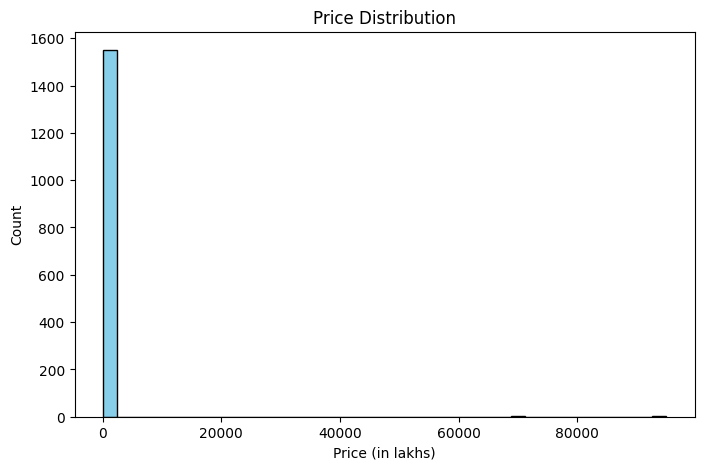

In [24]:
# Price distribution
plt.figure(figsize=(8,5))
plt.hist(uc['price(in lakhs)'], bins=40, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Count')
plt.show()

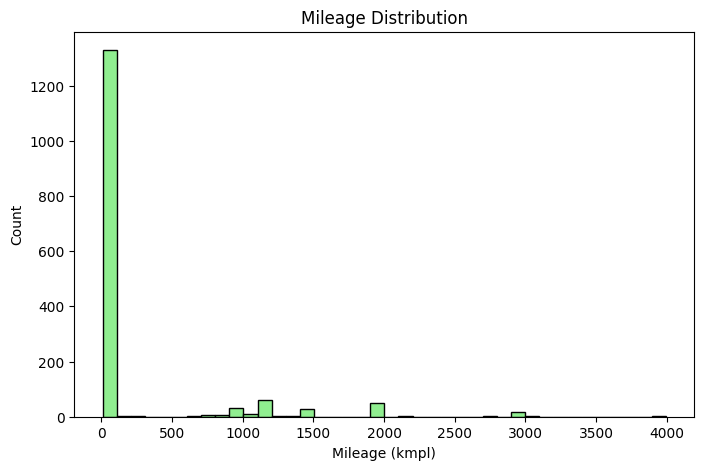

In [26]:
# Mileage distribution
plt.figure(figsize=(8,5))
plt.hist(uc['mileage(kmpl)'], bins=40, color='lightgreen', edgecolor='black')
plt.title('Mileage Distribution')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Count')
plt.show()

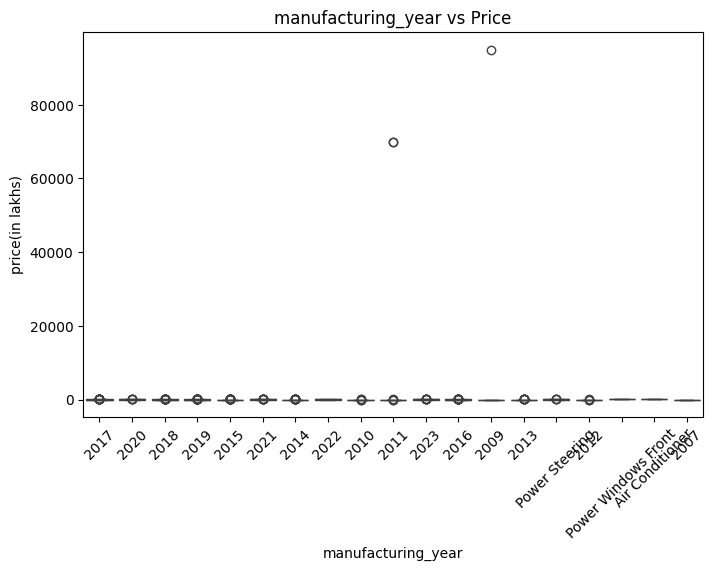

In [29]:
# Year vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='manufacturing_year', y='price(in lakhs)', data=uc)
plt.title('manufacturing_year vs Price')
plt.xticks(rotation=45)
plt.show()

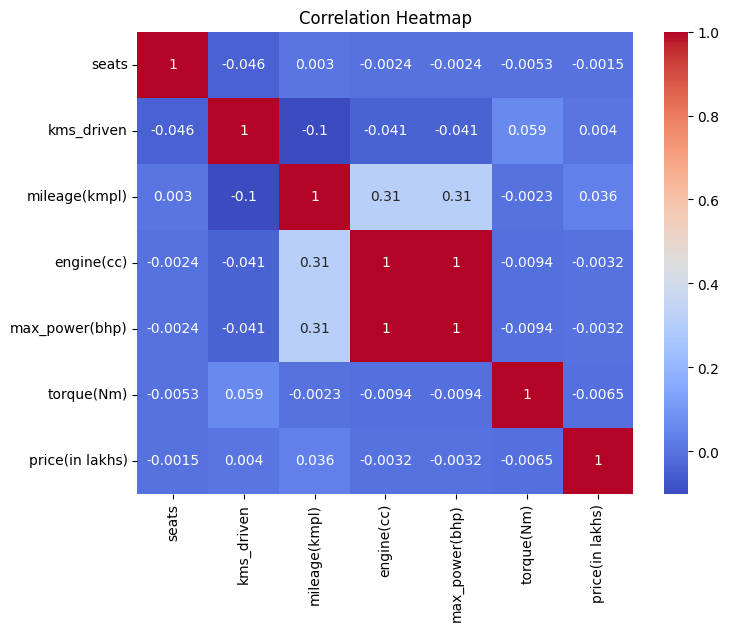

In [31]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(uc.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# STEP 6: Data preprocessing

In [33]:
# Convert categorical variables to numeric using one-hot encoding
uc_encoded = pd.get_dummies(uc, drop_first=True)

In [54]:
# Encode categorical columns
categorical_cols = ['insurance_validity', 'fuel_type', 'ownership', 'transmission']
uc_encoded = pd.get_dummies(uc, columns=categorical_cols, drop_first=True)

# STEP 7: Split features and target

In [55]:
X = uc_encoded.drop(['price(in lakhs)'], axis=1)
y = uc_encoded['price(in lakhs)']


In [61]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Train model (Random Forest)


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# STEP 9: Model Evaluation

In [64]:
test_data_predicition = rf.predict(X_test)

In [65]:
test_data_predicition

array([ 4.43013977, 12.15965   , 11.33325   ,  2.3055    , 11.35335   ,
       15.6935    ,  4.9309375 ,  5.8466    , 15.5266    , 18.8617    ,
        3.832075  ,  3.78626685,  3.7416267 , 16.5943    ,  6.2417    ,
       11.8554    , 26.34125   ,  3.59283409,  8.44178333])

In [67]:
y_pred = rf.predict(X_test)

print("\nR² Score:", metrics.r2_score(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R² Score: 0.6383773330537275
MAE: 2.3473188786359813
MSE: 9.238012249119542
RMSE: 3.0394098521126667


# STEP 10: Visualize predictions

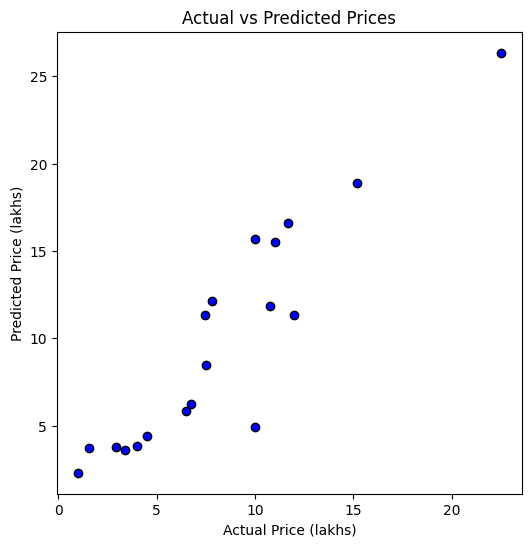

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.xlabel("Actual Price (lakhs)")
plt.ylabel("Predicted Price (lakhs)")
plt.title("Actual vs Predicted Prices")
plt.show()